# Creating the dataset from:
    - donateacry-corpus: https://github.com/gveres/donateacry-corpus/
    - ESC-50: https://github.com/karolpiczak/ESC-50

## need to eliminate the baby crying from the negatives

In [1]:
!pip install matplotlib
!pip install librosa

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/84/76/9267af394cb88ce5245b5a9d328ee90ccd5710a1d08b0ec363c3a86cd992/matplotlib-3.7.3-cp38-cp38-manylinux_2_17_aarch64.manylinux2014_aarch64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/9b/cb/08f884c4c2efd433a38876b1b8069bfecef3f2d21ff0ce635d455962f70f/contourpy-1.1.1-cp38-cp38-manylinux_2_17_aarch64.manylinux2014_aarch64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/b0/c1/37282cd270beee7da275a674539bf61dc367ffa13336692969e71690beb3/fonttools-4.43.1-cp38-cp38-manylinux_2_17_aarch64.manylinux2014_aarch64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

# donateacry cleaning and testing

In [2]:
import os
import IPython.display as ipd

import os
import numpy as np
import scipy
from scipy.io import wavfile
import scipy.fftpack as fft
from scipy.signal import get_window
import matplotlib.pyplot as plt
import pandas as pd  
import librosa as lb 
import librosa.display 

%matplotlib inline

In [3]:
cry_data_path = "./donateacry_corpus_cleaned_and_updated_data"
cry_categories = os.listdir(cry_data_path)
cry_categories = [cat for cat in cry_categories if cat != 'README.md']
cry_categories

['discomfort', 'tired', 'belly_pain', 'burping', 'hungry']

In [4]:
cry_testing_file = cry_data_path + "/" + cry_categories[0] + "/" + os.listdir(cry_data_path + "/" + cry_categories[0])[0]
cry_testing_file

'./donateacry_corpus_cleaned_and_updated_data/discomfort/10A40438-09AA-4A21-83B4-8119F03F7A11-1430925142-1.0-f-26-dc.wav'

In [5]:

ipd.Audio(cry_testing_file)

In [6]:
sample_rate, audio = wavfile.read(cry_testing_file)
print("Sample rate: {0}Hz".format(sample_rate))
print("Audio duration: {0}s".format(len(audio) / sample_rate))

Sample rate: 8000Hz
Audio duration: 7.0s


## go through the directory and put all files in one dataframe

In [5]:
# cries = pd.DataFrame(columns = ['filename', 'category'])
cries_list = np.array([[fname,category] for category in cry_categories for fname in os.listdir(cry_data_path + "/" + category)]) 
cries = pd.DataFrame(cries_list, columns = ['filename', 'classification'])

In [6]:
cries.head()

,filename,classification
0,10A40438-09AA-4A21-83B4-8119F03F7A11-143092514...,discomfort
1,d6cda191-4962-4308-9a36-46d5648a95ed-143108626...,discomfort
2,7b0e160e-0505-459e-8ecb-304d7afae9d2-143748697...,discomfort
3,1309B82C-F146-46F0-A723-45345AFA6EA8-143280169...,discomfort
4,999bf14b-e417-4b44-b746-9253f81efe38-143084501...,discomfort


In [21]:
print(set(cries['classification']))

<class 'pandas.core.series.Series'>


# ESC50 cleaning

In [15]:
csvPath = "./meta/esc50.csv" 
metadata = pd.read_csv(csvPath) 
# metadata.head()
clean_esc50 = metadata[metadata['category'] != "crying_baby"]
clean_esc50.head()

,filename,fold,target,category,esc10,src_file,take
0,1-100032-A-0.wav,1,0,dog,True,100032,A
1,1-100038-A-14.wav,1,14,chirping_birds,False,100038,A
2,1-100210-A-36.wav,1,36,vacuum_cleaner,False,100210,A
3,1-100210-B-36.wav,1,36,vacuum_cleaner,False,100210,B
4,1-101296-A-19.wav,1,19,thunderstorm,False,101296,A


In [ ]:
print(len(metadata))
print(len(clean_esc50))

## put esc50 common format (filename | classification)

In [16]:
esc50_formatted = clean_esc50.filter(['filename'],axis=1)
esc50_formatted.insert(1,'classification','negative')
esc50_formatted.head()

,filename,classification
0,1-100032-A-0.wav,negative
1,1-100038-A-14.wav,negative
2,1-100210-A-36.wav,negative
3,1-100210-B-36.wav,negative
4,1-101296-A-19.wav,negative


## MFCCs

In [17]:
def extract_mfccs(audio_file_path):
    n_mfcc = 10
    y, sr = librosa.load(audio_file_path)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    return mfccs.mean(axis=1) 

## cries

In [24]:
# List of audio file paths
cry_data_path = "./donateacry_corpus_cleaned_and_updated_data"
audio_files = np.array([f"{cry_data_path}/{category}/{fname}" for category in cry_categories for fname in os.listdir(cry_data_path + "/" + category)]) 

# Initialize an empty list to store the MFCC vectors
mfcc_vectors = []

# Extract MFCC vectors for each audio file and store them in the list
for audio_file_path in audio_files:
    mfcc_vector = extract_mfccs(audio_file_path)
    mfcc_vectors.append(mfcc_vector)

NameError: name 'n_mfcc' is not defined

In [29]:
n_mfcc = 10
cries_mfcc_df = pd.DataFrame(data=mfcc_vectors, columns=[f'MFCC_{i}' for i in range(1, n_mfcc + 1)])

# Now, 'df' contains the 10 MFCCs for each audio file as rows in the DataFrame
cries_mfcc_df.head()


,MFCC_1,MFCC_2,MFCC_3,MFCC_4,MFCC_5,MFCC_6,MFCC_7,MFCC_8,MFCC_9,MFCC_10
0,-243.042267,147.078979,-74.544868,-11.935884,0.091409,-44.496132,1.685033,1.311653,-24.178078,3.441578
1,-337.197357,116.165741,-107.521187,-16.738218,15.354076,-40.475506,7.085871,17.918938,-23.558468,-0.820606
2,-340.153992,188.384033,-10.891422,9.568656,21.079254,-22.424561,-1.612709,6.264339,-13.773880,5.847576
3,-276.378754,155.994522,-78.463280,-4.101474,3.821284,-55.568825,0.179907,10.941260,-24.056501,-0.227951
4,-438.819702,139.433563,-4.925777,-31.982075,3.686296,8.685968,-4.593336,-10.453959,-9.564993,-2.140277


In [30]:
print(cries_mfcc_df.size)
print(len(audio_files))

4570
457


# Concatenate dataframes

## Cries

In [32]:
cries_dataset = pd.concat([cries,mfcc_df], axis=1)
cries_dataset.head()

,filename,classification,MFCC_1,MFCC_2,MFCC_3,MFCC_4,MFCC_5,MFCC_6,MFCC_7,MFCC_8,MFCC_9,MFCC_10
0,10A40438-09AA-4A21-83B4-8119F03F7A11-143092514...,discomfort,-243.042267,147.078979,-74.544868,-11.935884,0.091409,-44.496132,1.685033,1.311653,-24.178078,3.441578
1,d6cda191-4962-4308-9a36-46d5648a95ed-143108626...,discomfort,-337.197357,116.165741,-107.521187,-16.738218,15.354076,-40.475506,7.085871,17.918938,-23.558468,-0.820606
2,7b0e160e-0505-459e-8ecb-304d7afae9d2-143748697...,discomfort,-340.153992,188.384033,-10.891422,9.568656,21.079254,-22.424561,-1.612709,6.264339,-13.773880,5.847576
3,1309B82C-F146-46F0-A723-45345AFA6EA8-143280169...,discomfort,-276.378754,155.994522,-78.463280,-4.101474,3.821284,-55.568825,0.179907,10.941260,-24.056501,-0.227951
4,999bf14b-e417-4b44-b746-9253f81efe38-143084501...,discomfort,-438.819702,139.433563,-4.925777,-31.982075,3.686296,8.685968,-4.593336,-10.453959,-9.564993,-2.140277


In [50]:
cries_dataset.to_csv('cries.csv', index=False)

## cries visualization

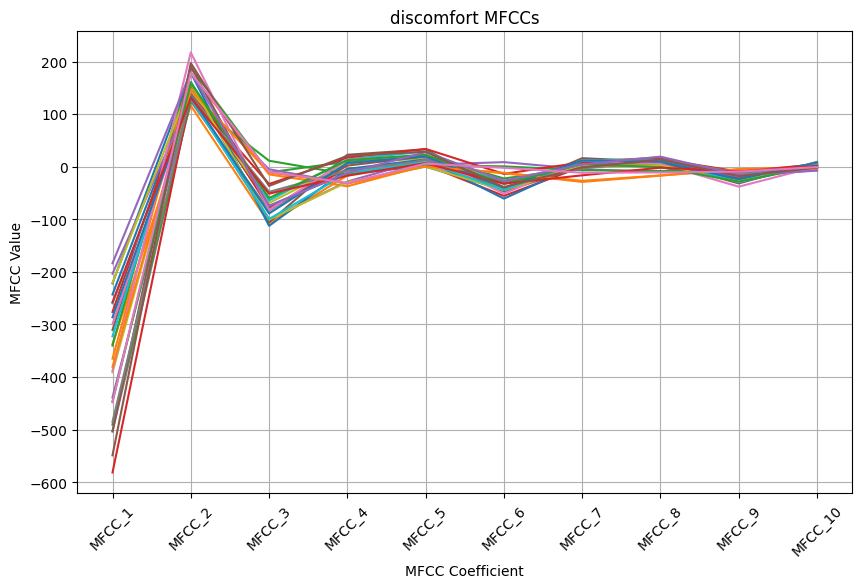

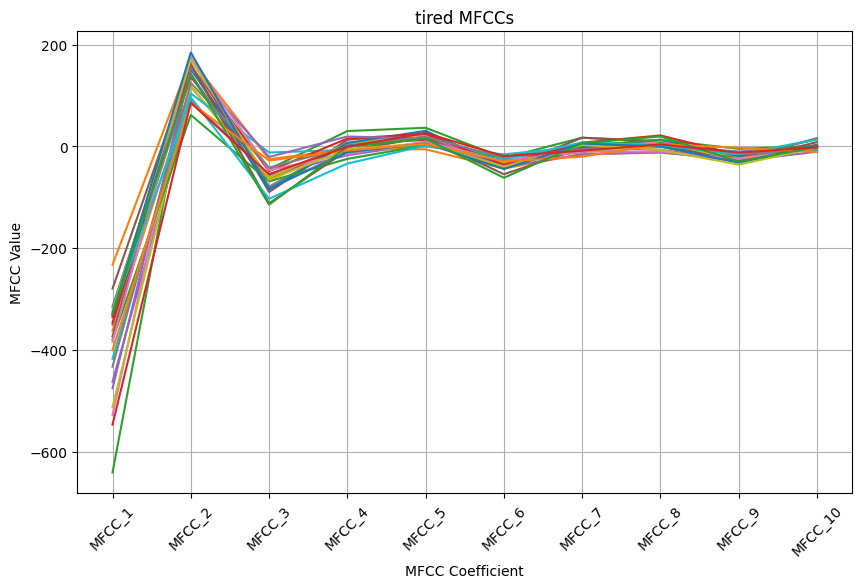

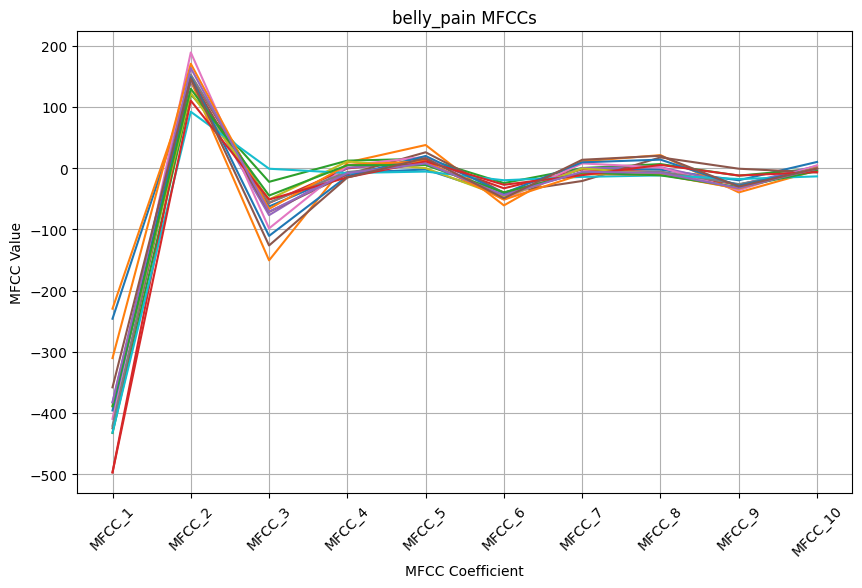

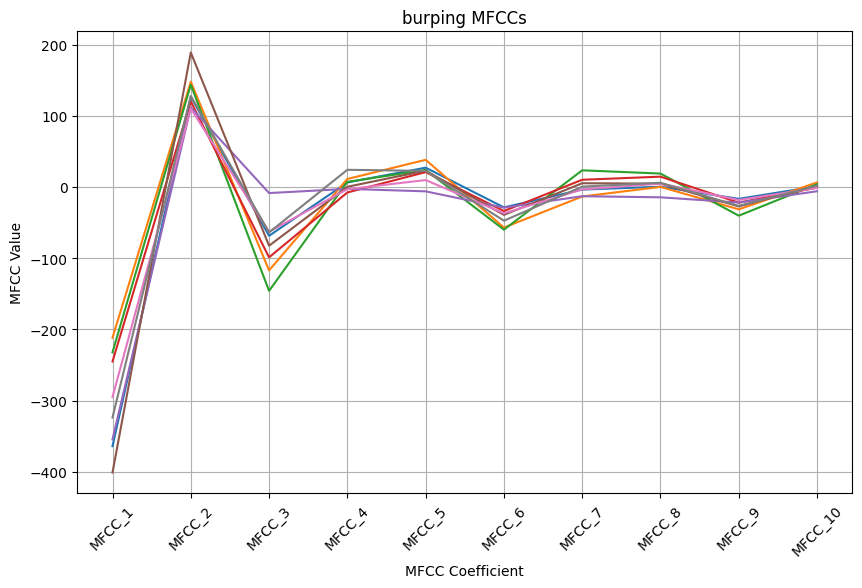

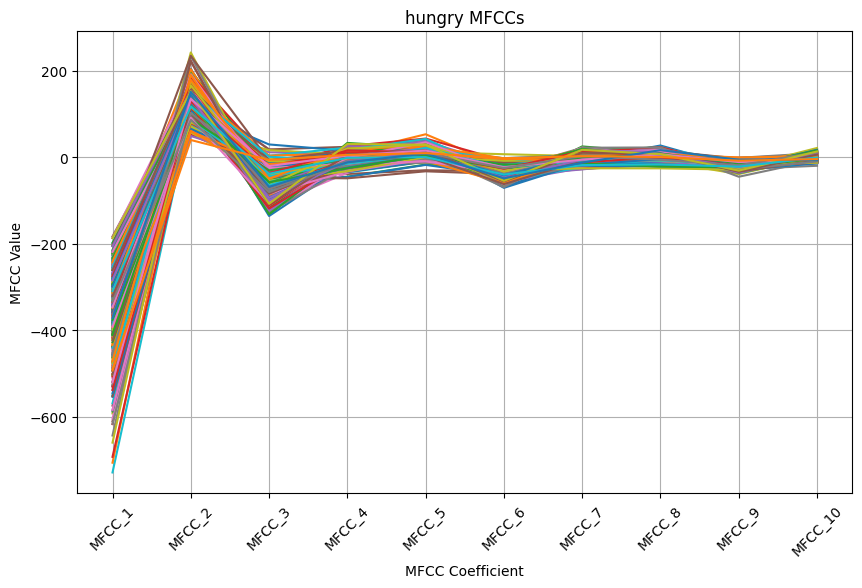

In [46]:
for i, category in enumerate(cry_categories):
    category_cries = cries_dataset.loc[cries_dataset['classification'] == category]
    plt.figure(figsize=(10, 6))
    for index, row in category_cries.iterrows():
        plt.plot(category_cries.columns[2:], row[2:], label=row['filename'])  # Assuming 'Filename' is the column with filenames

    plt.xlabel('MFCC Coefficient')
    plt.ylabel('MFCC Value')
    plt.title(f"{category} MFCCs")
    # plt.legend()
    plt.grid()
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()
